# Sample Variance vs. Variance

Short notebook to show why we use the $n-1$ term in sample variance.

Reminder if we know $\mu$ and $\sigma^2$:
$$\mu = \frac{1}{n}\sum_{i=0}^{N}X_i$$
$$\sigma^2 = \frac{1}{n}\sum_{i=0}^{N}(X_i - \mu)^2$$

However, if we're estimating them from a sample with $n$ points, we use $\overline{X}$ and $S^2$:
$$\overline{X} = \frac{1}{n}\sum_{i=0}^{n}X_i$$
$$S^2 = \frac{1}{n-1}\sum_{i=0}^{n}(X_i - \overline{X})^2$$

Why do we use $n-1$ as denominator here?

In [1]:
import numpy as np
import matplotlib
matplotlib.rc('text', usetex=True)
matplotlib.rc('font', family = 'serif')
from matplotlib import pyplot as plt

Let's sample $n=100$ points from a standard normal distribution with known $\mu = 0$ and $\sigma^2 = 1$:

In [2]:
n = 100
np.random.seed(42)
X = np.random.randn(n)
X

array([ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337,
       -0.23413696,  1.57921282,  0.76743473, -0.46947439,  0.54256004,
       -0.46341769, -0.46572975,  0.24196227, -1.91328024, -1.72491783,
       -0.56228753, -1.01283112,  0.31424733, -0.90802408, -1.4123037 ,
        1.46564877, -0.2257763 ,  0.0675282 , -1.42474819, -0.54438272,
        0.11092259, -1.15099358,  0.37569802, -0.60063869, -0.29169375,
       -0.60170661,  1.85227818, -0.01349722, -1.05771093,  0.82254491,
       -1.22084365,  0.2088636 , -1.95967012, -1.32818605,  0.19686124,
        0.73846658,  0.17136828, -0.11564828, -0.3011037 , -1.47852199,
       -0.71984421, -0.46063877,  1.05712223,  0.34361829, -1.76304016,
        0.32408397, -0.38508228, -0.676922  ,  0.61167629,  1.03099952,
        0.93128012, -0.83921752, -0.30921238,  0.33126343,  0.97554513,
       -0.47917424, -0.18565898, -1.10633497, -1.19620662,  0.81252582,
        1.35624003, -0.07201012,  1.0035329 ,  0.36163603, -0.64

Let's compute $\overline{X}$:

In [3]:
X_bar = sum(X)/n
X_bar

-0.10384651739409387

In [4]:
X.mean()

-0.10384651739409384

Also let's compute the (uncorrected) sample variance $S_n^2$ and the (corrected) sample variance $S^2$ of these points using $\overline{X}$ instead of the unknown $\mu$:

In [5]:
var = sum((X - X_bar)**2)/n     # S_n^2
SS = sum((X - X_bar)**2)/(n-1)  # S^2
var, SS

(0.8165221946938586, 0.8247698936301602)

We see that due to construction $S_n^2 < S^2$ and actually $S^2 = \frac{n}{n-1}S_n^2$ (also known as [Bessel's correction](https://en.wikipedia.org/wiki/Bessel%27s_correction)).

Same functions in numpy:

In [6]:
np.var(X - X_bar), np.var(X - X_bar, ddof=1)

(0.8165221946938584, 0.82476989363016)

## Repeat and plot

Now let's just repeat that $m$ times and plot them:

In [7]:
m = 500
np.random.seed(42)
Xs = np.random.randn(m, n)

In [8]:
X_bars = []
vars = []
SSs = []

for j in range(m):
    X = Xs[j]
    X_bar = sum(X)/n
    X_bars.append(X_bar)
    
    var = sum((X - X_bar)**2)/n
    vars.append(var)
    
    SS = sum((X - X_bar)**2)/(n-1)
    SSs.append(SS)

In [9]:
# or the same much faster in numpy directly:
X_bars = Xs.mean(axis=1)
vars = Xs.var(axis=1)
SSs = Xs.var(axis=1, ddof=1)

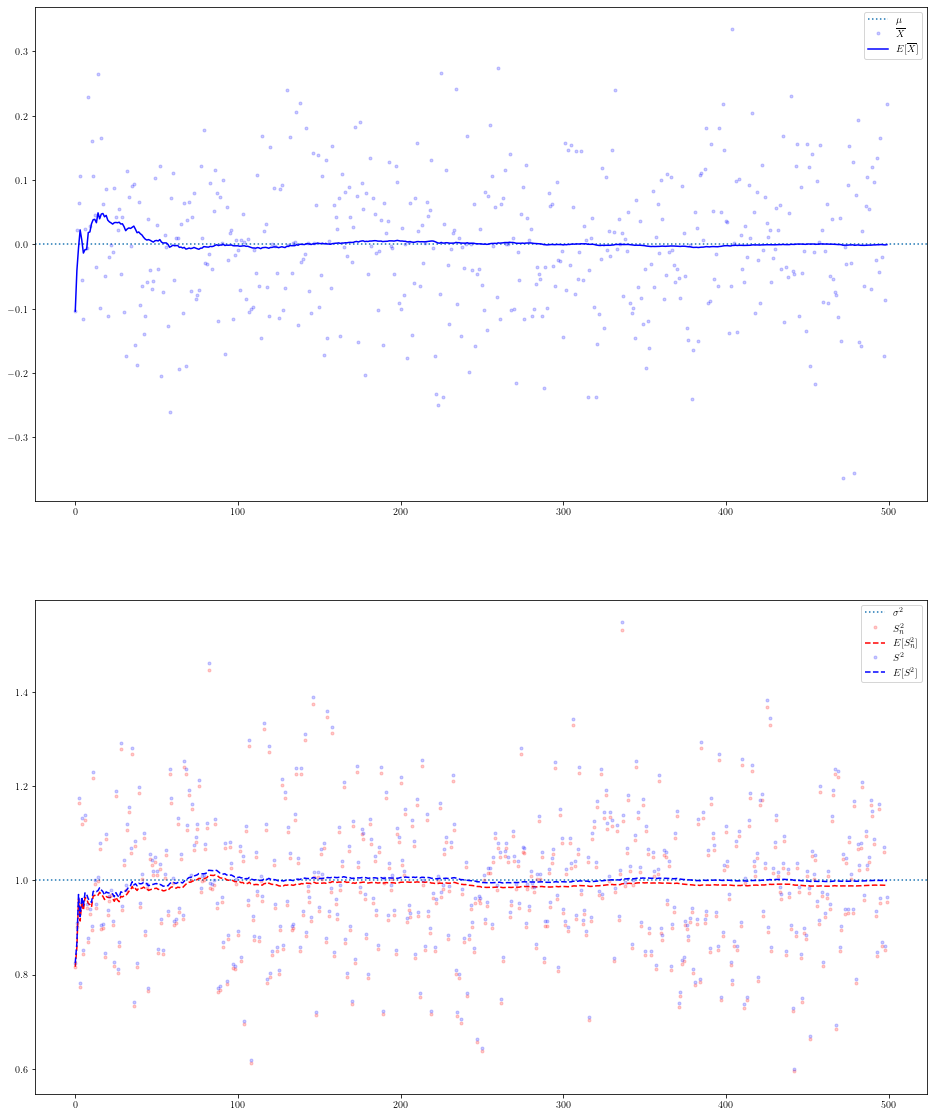

In [10]:
fig, axs = plt.subplots(2,1, figsize=(16,20))
axs[0].axhline(0, linestyle=':', label='$\mu$')
axs[0].plot(range(m), X_bars, 'b.', alpha=.2, label=r'$\overline{X}$')
axs[0].plot(range(m), [np.mean(X_bars[:j+1]) for j in range(m)], 'b-', label=r'$E[\overline{X}]$')
axs[0].legend()

axs[1].axhline(1, linestyle=':', label=r'$\sigma^2$')
axs[1].plot(range(m), vars, 'r.', alpha=.2, label=r'$S_n^2$')
axs[1].plot(range(m), [np.mean(vars[:j+1]) for j in range(m)], 'r--', label=r'$E[S_n^2]$')

axs[1].plot(range(m), SSs, 'b.', alpha=.2, label=r'$S^2$')
axs[1].plot(range(m), [np.mean(SSs[:j+1]) for j in range(m)], 'b--', label=r'$E[S^2]$')
axs[1].legend()

plt.show()

$\newcommand{\E}{\mathrm{E}}$

In the first plot we can see that $\E(\overline{X})$ actually goes against $\mu$.

In the second one, we can see that $\E(S^2)$ (so the one with the $n-1$ denominator) goes against $\sigma^2$, while $\E(S_n^2)$ (so the default variance simply with $n$ as denominator) goes against $\frac{n-1}{n}\sigma^2$.

So we can see that dividing by $n-1$ makes sense if we want to estimate the true unknown variance from our sample, as it doesn't underestimate.

## Proof:

$\newcommand{\Var}{\mathrm{Var}}$

So let's show that
$$\E(S^2) = \sigma^2$$

Let's just substitute $S^2$ with its definitition:
$$\E(S^2) = \E\left(\frac{\sum_{i=1}^n(X_i - \overline{X})^2}{n-1}\right)$$

Let's focus on the nominator and pull the $^2$ in:
$$\sum_{i=1}^n(X_i - \overline{X})^2 = \sum_{i=1}^n(X_i^2 - 2X_i\overline{X} + \overline{X}^2)$$

Now let's split the sum and then pull out constant terms:
$$= \sum_{i=1}^n X_i^2 - \sum_{i=1}^n 2X_i\overline{X} + \sum_{i=1}^n \overline{X}^2$$
$$= \sum_{i=1}^n X_i^2 - 2\overline{X}\sum_{i=1}^n X_i + n\overline{X}^2$$

Remember that $\overline{X} = \frac{1}{n}\sum_{i=1}^n X_i$, which we can re-arrange into $n\overline{X} = \sum_{i=1}^n X_i$ to substitute the middle term:
$$= \sum_{i=1}^n X_i^2 - 2\overline{X}n\overline{X} + n\overline{X}^2$$
$$= \sum_{i=1}^n X_i^2 - 2n\overline{X}^2 + n\overline{X}^2$$

Leaving us with:
$$\sum_{i=1}^n(X_i - \overline{X})^2 = \sum_{i=1}^n X_i^2 - n\overline{X}^2$$

(Note that the sum is only restricted to the first term, so this is equal to $(\Sigma X_i^2) - n\overline{X}^2$.)

Now let's plug that back into
$$\E(S^2) = \E\left(\frac{\sum_{i=1}^n(X_i - \overline{X})^2}{n-1}\right) = \E\left(\frac{\sum_{i=1}^n X_i^2 - n\overline{X}^2}{n-1}\right)$$

Remember the following nice properties of $E$:
$$\E(\Sigma X_i) = \Sigma \E(X_i)$$
$$\E(cX) = cE(X)$$

These allow us to pull $E$ in now:
$$\E\left(\frac{\sum_{i=1}^n X_i^2 - n\overline{X}^2}{n-1}\right) = \frac{\sum_{i=1}^n \E(X_i^2) - nE(\overline{X}^2)}{n-1}$$

Remember this nice property of the variance:
$$\Var(X) = \E(X^2) - \E(X)^2$$
So in our case:
$$\sigma^2 = \E(X^2) - \mu^2$$
Re-arranging leaves us with
$$\E(X^2) = \sigma^2 + \mu^2$$

Similarly:
$$\Var(\overline{X}) = \E(\overline{X}^2) - \E(\overline{X})^2$$
$$\Rightarrow \Var(\overline{X}) = \E(\overline{X}^2) - \mu^2$$
Re-arranging leaves us with
$$\E(\overline{X}^2) = \Var(\overline{X}) + \mu^2$$

Also remember that $\overline{X} = \frac{1}{n}\sum X_i$ and that $\Var(\sum X_i) = \sum \Var(X_i)$ (for independent $X_i$) and that we're sampling all $X_i$ the same way, so that all $\Var(X_i) = \sigma^2$. With this we can solve
$$\Var(\overline{X}) = \Var\left(\frac{\sum X_i}{n}\right) = \frac{\sum \Var(X_i)}{n^2} = \frac{n\sigma^2}{n^2} = \frac{\sigma^2}{n}$$
leaving us with
$$\E(\overline{X}^2) = \frac{\sigma^2}{n} + \mu^2$$

With these we can go back to our 
$$\frac{\sum_{i=1}^n \E(X_i^2) - nE(\overline{X}^2)}{n-1}$$
and simply substitude:
$$= \frac{\sum_{i=1}^n (\sigma^2 + \mu^2) - n\left(\frac{\sigma^2}{n} + \mu^2\right)}{n-1}$$
$$= \frac{n\sigma^2 + n\mu^2 - \sigma^2 + n\mu^2}{n-1}$$
$$= \frac{(n-1)\sigma^2}{n-1}$$
$$= \sigma^2$$

Hence, we've shown:
$$\E(S^2) = \sigma^2$$

## Cumulative version for a single experiment:

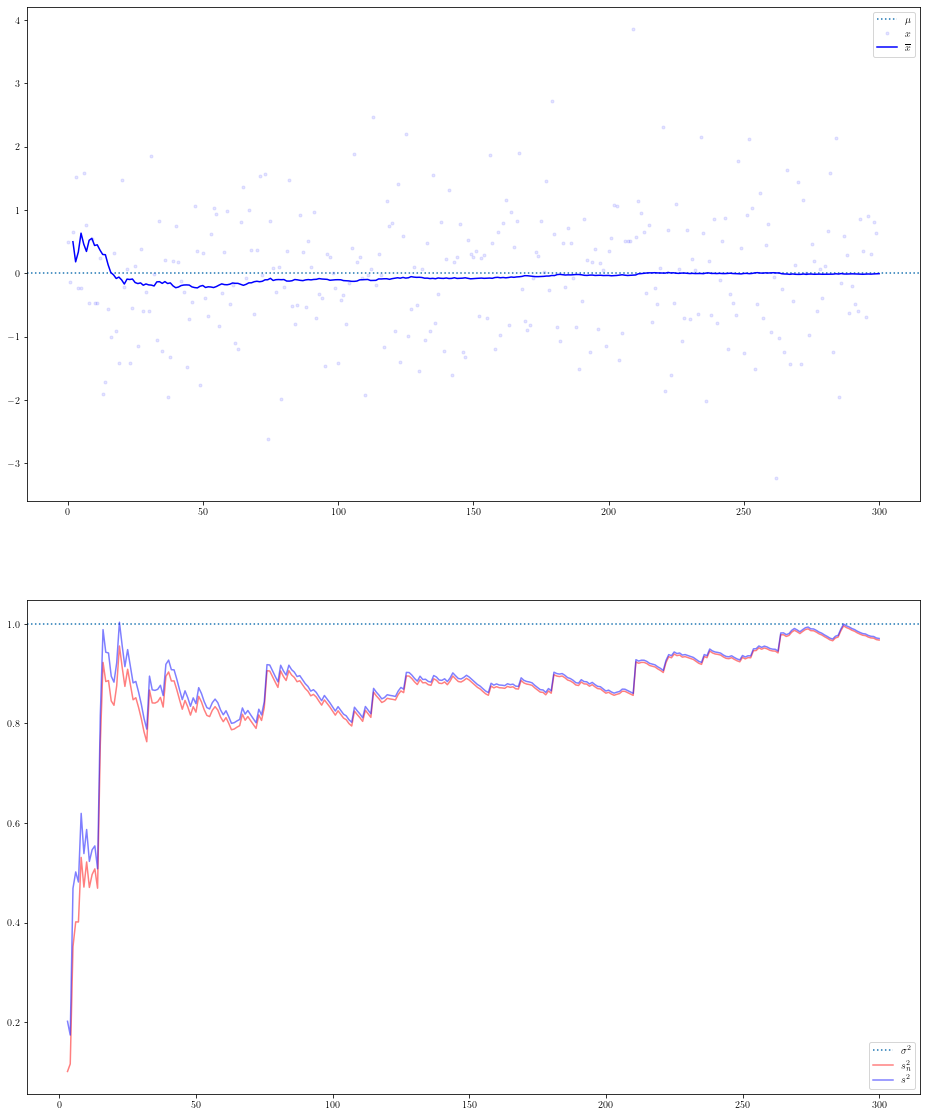

In [11]:
n=300
np.random.seed(42)
xs = np.random.randn(n)

# compute a cumulative mean and variances here:
x_bars = np.array([xs[:j].mean() for j in range(1, n)])
vars = np.array([xs[:j].var() for j in range(2, n)])
sss = np.array([xs[:j].var(ddof=1) for j in range(2, n)])

fig, axs = plt.subplots(2,1, figsize=(16,20))
axs[0].axhline(0, linestyle=':', label='$\mu$')
axs[0].plot(range(n), xs, 'b.', alpha=.1, label='$x$')
axs[0].plot(range(2,n+1), x_bars, 'b-', label=r'$\overline{x}$')
axs[0].legend()

axs[1].axhline(1, linestyle=':', label=r'$\sigma^2$')
axs[1].plot(range(3,n+1), vars, 'r-', alpha=.5, label=r'$s_n^2$')
axs[1].plot(range(3,n+1), sss, 'b-', alpha=.5, label=r'$s^2$')
#axs[1].set_ylim(0.75, 1.01)
axs[1].legend()

plt.show()

## Further Reading:

- https://en.wikipedia.org/wiki/Variance#Sample_variance
- https://en.wikipedia.org/wiki/Bessel%27s_correction